### Importing necessary libraries

In [1]:
from nsepy import get_history
from datetime import date
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

## Q:1 How did we choose the stocks?

In this notebook, first we will import the list of top 100 companies based on Market Capitalization. Then we will find the returns and standard deviation of top 30 companies out of the 100 companies. Then we will select the companies from the two categories:
1. Companies with highest returns.
2. Companies with lowest standard deviation/volatility/risk.

#### Getting the list of top 100 companies based on Market Capitalization (Mar 2020)

In [2]:
top100 = pd.read_excel('MCAP_TOP100.xlsx', sheet_name='MCAP31032020', usecols='B:C')
top100

,Symbol,Company Name
0,RELIANCE,Reliance Industries Limited
1,TCS,Tata Consultancy Services Limited
2,HINDUNILVR,Hindustan Unilever Limited
3,HDFCBANK,HDFC Bank Limited
4,HDFC,Housing Development Finance Corporation Limited
...,...,...
95,GLAXO,GlaxoSmithKline Pharmaceuticals Limited
96,3MINDIA,3M India Limited
97,PEL,Piramal Enterprises Limited
98,KANSAINER,Kansai Nerolac Paints Limited


In [3]:
# We will take only top 50 companies to select our stock from.
top30 = list(top100['Symbol'])[:30]
top30

['RELIANCE',
 'TCS',
 'HINDUNILVR',
 'HDFCBANK',
 'HDFC',
 'INFY',
 'KOTAKBANK',
 'BHARTIARTL',
 'ITC',
 'ICICIBANK',
 'SBIN',
 'ASIANPAINT',
 'DMART',
 'BAJFINANCE',
 'MARUTI',
 'HCLTECH',
 'LT',
 'WIPRO',
 'AXISBANK',
 'ULTRACEMCO',
 'HDFCLIFE',
 'COALINDIA',
 'ONGC',
 'SUNPHARMA',
 'NTPC',
 'POWERGRID',
 'TITAN',
 'DABUR',
 'IOC',
 'BAJAJFINSV']

### Getting the Close Price for these top 30 companies

In [4]:
start_date = date(2015,4,1)
end_date = date(2017,3,31)
df = pd.DataFrame()
for stock in top30:
    df[stock] = get_history(symbol=stock, start=start_date, end=end_date)['Close']

In [5]:
df

,RELIANCE,TCS,HINDUNILVR,HDFCBANK,HDFC,INFY,KOTAKBANK,BHARTIARTL,ITC,ICICIBANK,...,HDFCLIFE,COALINDIA,ONGC,SUNPHARMA,NTPC,POWERGRID,TITAN,DABUR,IOC,BAJAJFINSV
Date,,,,,,,,,,,,,,,,,,,,,
2015-04-01,836.05,2542.65,883.50,1033.25,1337.05,2173.95,1361.05,402.30,332.45,323.15,...,NaN,363.00,306.45,1081.15,147.75,146.45,390.40,266.55,370.60,1427.55
2015-04-06,824.65,2547.30,907.95,1031.95,1330.60,2178.20,1397.60,400.80,341.00,321.25,...,NaN,360.75,317.25,1169.30,152.10,147.95,403.60,272.95,374.00,1426.60
2015-04-07,832.85,2585.00,913.45,1032.75,1328.70,2159.50,1386.85,404.75,340.60,317.40,...,NaN,359.60,319.00,1152.05,156.30,147.95,406.60,274.30,372.20,1431.20
2015-04-08,865.90,2641.40,912.55,1035.55,1299.70,2200.55,1371.60,419.15,346.25,315.10,...,NaN,380.35,313.00,1150.45,156.10,147.30,407.45,284.35,377.15,1455.60
2015-04-09,895.10,2664.55,926.45,1056.10,1303.05,2215.00,1430.60,407.20,347.15,320.60,...,NaN,386.95,310.15,1113.45,157.35,151.00,399.95,279.90,375.00,1464.65
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2017-03-27,1251.10,2412.05,898.80,1409.85,1474.70,1028.85,871.15,338.70,281.60,273.15,...,NaN,291.50,188.90,691.20,163.35,194.85,447.95,274.50,370.90,4044.80
2017-03-28,1245.75,2429.95,903.10,1420.20,1504.10,1035.15,859.45,340.75,280.50,277.00,...,NaN,290.35,186.90,698.60,164.90,196.70,453.65,274.70,369.05,4090.75
2017-03-29,1256.65,2444.60,912.55,1428.60,1522.05,1031.85,857.60,344.85,283.20,282.20,...,NaN,294.10,186.95,687.65,163.95,196.85,455.00,275.70,370.15,4062.65


In [6]:
# we can see a lot of missing values in the columns, checking for missng value counts for each column
df.isna().sum()

RELIANCE        0
TCS             0
HINDUNILVR      0
HDFCBANK        0
HDFC            0
INFY            0
KOTAKBANK       0
BHARTIARTL      0
ITC             0
ICICIBANK       0
SBIN            0
ASIANPAINT      0
DMART         486
BAJFINANCE      0
MARUTI          0
HCLTECH         0
LT              0
WIPRO           0
AXISBANK        0
ULTRACEMCO      0
HDFCLIFE      495
COALINDIA       0
ONGC            0
SUNPHARMA       0
NTPC            0
POWERGRID       0
TITAN           0
DABUR           0
IOC             0
BAJAJFINSV      0
dtype: int64

In [7]:
# It is better to drop the columns containing.
# We will analyze only the companies having non null values to get the list of companies for our portfolio.
df.dropna(axis=1, inplace=True)
df

,RELIANCE,TCS,HINDUNILVR,HDFCBANK,HDFC,INFY,KOTAKBANK,BHARTIARTL,ITC,ICICIBANK,...,ULTRACEMCO,COALINDIA,ONGC,SUNPHARMA,NTPC,POWERGRID,TITAN,DABUR,IOC,BAJAJFINSV
Date,,,,,,,,,,,,,,,,,,,,,
2015-04-01,836.05,2542.65,883.50,1033.25,1337.05,2173.95,1361.05,402.30,332.45,323.15,...,2883.70,363.00,306.45,1081.15,147.75,146.45,390.40,266.55,370.60,1427.55
2015-04-06,824.65,2547.30,907.95,1031.95,1330.60,2178.20,1397.60,400.80,341.00,321.25,...,2892.55,360.75,317.25,1169.30,152.10,147.95,403.60,272.95,374.00,1426.60
2015-04-07,832.85,2585.00,913.45,1032.75,1328.70,2159.50,1386.85,404.75,340.60,317.40,...,2931.85,359.60,319.00,1152.05,156.30,147.95,406.60,274.30,372.20,1431.20
2015-04-08,865.90,2641.40,912.55,1035.55,1299.70,2200.55,1371.60,419.15,346.25,315.10,...,2986.45,380.35,313.00,1150.45,156.10,147.30,407.45,284.35,377.15,1455.60
2015-04-09,895.10,2664.55,926.45,1056.10,1303.05,2215.00,1430.60,407.20,347.15,320.60,...,2963.95,386.95,310.15,1113.45,157.35,151.00,399.95,279.90,375.00,1464.65
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2017-03-27,1251.10,2412.05,898.80,1409.85,1474.70,1028.85,871.15,338.70,281.60,273.15,...,3951.25,291.50,188.90,691.20,163.35,194.85,447.95,274.50,370.90,4044.80
2017-03-28,1245.75,2429.95,903.10,1420.20,1504.10,1035.15,859.45,340.75,280.50,277.00,...,3987.30,290.35,186.90,698.60,164.90,196.70,453.65,274.70,369.05,4090.75
2017-03-29,1256.65,2444.60,912.55,1428.60,1522.05,1031.85,857.60,344.85,283.20,282.20,...,3999.35,294.10,186.95,687.65,163.95,196.85,455.00,275.70,370.15,4062.65


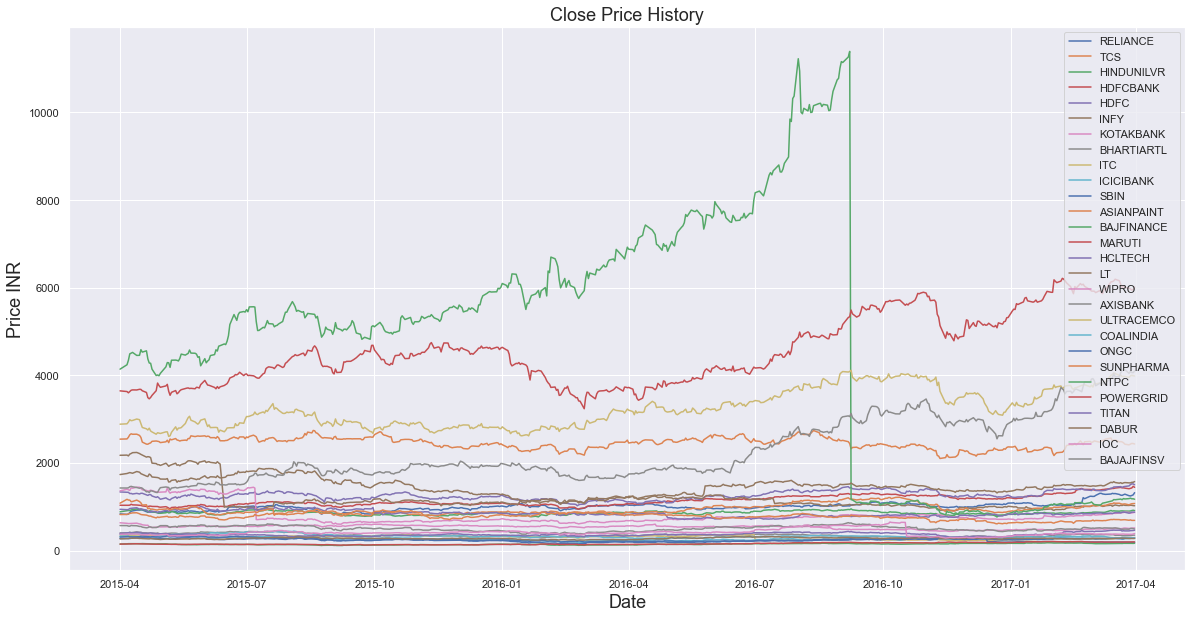

In [8]:
# Visualizing the closing prices
title = 'Close Price History'
my_stocks = df

plt.figure(figsize=(20,10))
for c in my_stocks.columns.values:
  plt.plot(my_stocks[c], label = c)
plt.title(title, fontsize = 18)
plt.xlabel('Date', fontsize = 18)
plt.ylabel('Price INR', fontsize = 18)
plt.legend(my_stocks.columns.values)
plt.show()

### Getting the returns and volatility (standard deviation) for all these companies.

In [9]:
returns = df.pct_change()
returns

,RELIANCE,TCS,HINDUNILVR,HDFCBANK,HDFC,INFY,KOTAKBANK,BHARTIARTL,ITC,ICICIBANK,...,ULTRACEMCO,COALINDIA,ONGC,SUNPHARMA,NTPC,POWERGRID,TITAN,DABUR,IOC,BAJAJFINSV
Date,,,,,,,,,,,,,,,,,,,,,
2015-04-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2015-04-06,-0.013636,0.001829,0.027674,-0.001258,-0.004824,0.001955,0.026854,-0.003729,0.025718,-0.005880,...,0.003069,-0.006198,0.035242,0.081534,0.029442,0.010242,0.033811,0.024011,0.009174,-0.000665
2015-04-07,0.009944,0.014800,0.006058,0.000775,-0.001428,-0.008585,-0.007692,0.009855,-0.001173,-0.011984,...,0.013587,-0.003188,0.005516,-0.014752,0.027613,0.000000,0.007433,0.004946,-0.004813,0.003224
2015-04-08,0.039683,0.021818,-0.000985,0.002711,-0.021826,0.019009,-0.010996,0.035578,0.016588,-0.007246,...,0.018623,0.057703,-0.018809,-0.001389,-0.001280,-0.004393,0.002091,0.036639,0.013299,0.017049
2015-04-09,0.033722,0.008764,0.015232,0.019845,0.002578,0.006567,0.043015,-0.028510,0.002599,0.017455,...,-0.007534,0.017352,-0.009105,-0.032161,0.008008,0.025119,-0.018407,-0.015650,-0.005701,0.006217
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2017-03-27,-0.027705,-0.006242,-0.001555,-0.010180,0.008273,-0.002472,-0.009325,-0.005286,0.002135,-0.005823,...,-0.005712,-0.021319,-0.015633,-0.018042,-0.007594,0.005677,0.000000,-0.024173,-0.004830,-0.020475
2017-03-28,-0.004276,0.007421,0.004784,0.007341,0.019936,0.006123,-0.013431,0.006053,-0.003906,0.014095,...,0.009124,-0.003945,-0.010588,0.010706,0.009489,0.009494,0.012725,0.000729,-0.004988,0.011360
2017-03-29,0.008750,0.006029,0.010464,0.005915,0.011934,-0.003188,-0.002153,0.012032,0.009626,0.018773,...,0.003022,0.012915,0.000268,-0.015674,-0.005761,0.000763,0.002976,0.003640,0.002981,-0.006869


In [10]:
mean_returns = returns.mean()
mean_returns

RELIANCE      0.001054
TCS           0.000004
HINDUNILVR    0.000150
HDFCBANK      0.000728
HDFC          0.000367
INFY         -0.001017
KOTAKBANK    -0.000391
BHARTIARTL   -0.000132
ITC          -0.000094
ICICIBANK    -0.000094
SBIN          0.000367
ASIANPAINT    0.000675
BAJFINANCE    0.000500
MARUTI        0.001146
HCLTECH      -0.000003
LT           -0.000051
WIPRO        -0.000334
AXISBANK     -0.000103
ULTRACEMCO    0.000790
COALINDIA    -0.000286
ONGC         -0.000707
SUNPHARMA    -0.000719
NTPC          0.000358
POWERGRID     0.000697
TITAN         0.000517
DABUR         0.000197
IOC           0.000650
BAJAJFINSV    0.002340
dtype: float64

In [11]:
std_dev = returns.std()
std_dev

RELIANCE      0.016047
TCS           0.013710
HINDUNILVR    0.013165
HDFCBANK      0.010211
HDFC          0.016256
INFY          0.027365
KOTAKBANK     0.027152
BHARTIARTL    0.017299
ITC           0.021206
ICICIBANK     0.020982
SBIN          0.021258
ASIANPAINT    0.016381
BAJFINANCE    0.046343
MARUTI        0.016244
HCLTECH       0.016888
LT            0.017136
WIPRO         0.012720
AXISBANK      0.019937
ULTRACEMCO    0.016413
COALINDIA     0.017310
ONGC          0.023794
SUNPHARMA     0.019585
NTPC          0.015637
POWERGRID     0.013678
TITAN         0.018618
DABUR         0.015275
IOC           0.029179
BAJAJFINSV    0.020189
dtype: float64

### Now we will look for stocks that have maximum return and min standard deviation, for our portfolio.

## Q:2 What is the impact of increasing the number of stocks in the portfolio?
It is generally true that when stocks are randomly selected and combined in equal proportions into a portfolio, the risk of the portfolio declines as the number of different stocks in it increases.
However, it is also observed that the risk reduction effect diminishes rapidly as the number of stocks increases. The economic benifits of diversification are virtually exhausted when a portfolio contains ten or so stocks.

In [12]:
# Top 10 companies based on return
top10return = mean_returns.nlargest(n=10, keep='all')
top10return

BAJAJFINSV    0.002340
MARUTI        0.001146
RELIANCE      0.001054
ULTRACEMCO    0.000790
HDFCBANK      0.000728
POWERGRID     0.000697
ASIANPAINT    0.000675
IOC           0.000650
TITAN         0.000517
BAJFINANCE    0.000500
dtype: float64

In [13]:
# Top 10 companies based on lowest risk
lowest10risk = std_dev.nsmallest(n=10, keep='all')
lowest10risk

HDFCBANK      0.010211
WIPRO         0.012720
HINDUNILVR    0.013165
POWERGRID     0.013678
TCS           0.013710
DABUR         0.015275
NTPC          0.015637
RELIANCE      0.016047
MARUTI        0.016244
HDFC          0.016256
dtype: float64

### List of companies for our portfolio.

In [14]:
companies = set(list(top10return.index) + list(lowest10risk.index))
print(len(companies))
companies

16


{'ASIANPAINT',
 'BAJAJFINSV',
 'BAJFINANCE',
 'DABUR',
 'HDFC',
 'HDFCBANK',
 'HINDUNILVR',
 'IOC',
 'MARUTI',
 'NTPC',
 'POWERGRID',
 'RELIANCE',
 'TCS',
 'TITAN',
 'ULTRACEMCO',
 'WIPRO'}

### Now we will use the above list of 16 companies to make our portfolio.

In [15]:
price_data = df[companies]
price_data

,ASIANPAINT,DABUR,HINDUNILVR,MARUTI,NTPC,IOC,RELIANCE,WIPRO,ULTRACEMCO,BAJFINANCE,HDFC,BAJAJFINSV,POWERGRID,TCS,TITAN,HDFCBANK
Date,,,,,,,,,,,,,,,,
2015-04-01,821.70,266.55,883.50,3644.70,147.75,370.60,836.05,633.20,2883.70,4140.05,1337.05,1427.55,146.45,2542.65,390.40,1033.25
2015-04-06,824.50,272.95,907.95,3628.95,152.10,374.00,824.65,621.15,2892.55,4240.85,1330.60,1426.60,147.95,2547.30,403.60,1031.95
2015-04-07,835.20,274.30,913.45,3599.90,156.30,372.20,832.85,615.05,2931.85,4341.20,1328.70,1431.20,147.95,2585.00,406.60,1032.75
2015-04-08,846.85,284.35,912.55,3628.70,156.10,377.15,865.90,616.30,2986.45,4489.20,1299.70,1455.60,147.30,2641.40,407.45,1035.55
2015-04-09,853.15,279.90,926.45,3659.20,157.35,375.00,895.10,617.15,2963.95,4504.65,1303.05,1464.65,151.00,2664.55,399.95,1056.10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2017-03-27,1042.90,274.50,898.80,5985.80,163.35,370.90,1251.10,504.00,3951.25,1185.00,1474.70,4044.80,194.85,2412.05,447.95,1409.85
2017-03-28,1057.85,274.70,903.10,5974.25,164.90,369.05,1245.75,507.55,3987.30,1194.75,1504.10,4090.75,196.70,2429.95,453.65,1420.20
2017-03-29,1068.10,275.70,912.55,5944.15,163.95,370.15,1256.65,512.25,3999.35,1180.75,1522.05,4062.65,196.85,2444.60,455.00,1428.60


In [16]:
return_data = price_data.pct_change()
return_data

,ASIANPAINT,DABUR,HINDUNILVR,MARUTI,NTPC,IOC,RELIANCE,WIPRO,ULTRACEMCO,BAJFINANCE,HDFC,BAJAJFINSV,POWERGRID,TCS,TITAN,HDFCBANK
Date,,,,,,,,,,,,,,,,
2015-04-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2015-04-06,0.003408,0.024011,0.027674,-0.004321,0.029442,0.009174,-0.013636,-0.019030,0.003069,0.024348,-0.004824,-0.000665,0.010242,0.001829,0.033811,-0.001258
2015-04-07,0.012978,0.004946,0.006058,-0.008005,0.027613,-0.004813,0.009944,-0.009820,0.013587,0.023663,-0.001428,0.003224,0.000000,0.014800,0.007433,0.000775
2015-04-08,0.013949,0.036639,-0.000985,0.008000,-0.001280,0.013299,0.039683,0.002032,0.018623,0.034092,-0.021826,0.017049,-0.004393,0.021818,0.002091,0.002711
2015-04-09,0.007439,-0.015650,0.015232,0.008405,0.008008,-0.005701,0.033722,0.001379,-0.007534,0.003442,0.002578,0.006217,0.025119,0.008764,-0.018407,0.019845
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2017-03-27,-0.020061,-0.024173,-0.001555,-0.003139,-0.007594,-0.004830,-0.027705,-0.018022,-0.005712,0.006754,0.008273,-0.020475,0.005677,-0.006242,0.000000,-0.010180
2017-03-28,0.014335,0.000729,0.004784,-0.001930,0.009489,-0.004988,-0.004276,0.007044,0.009124,0.008228,0.019936,0.011360,0.009494,0.007421,0.012725,0.007341
2017-03-29,0.009689,0.003640,0.010464,-0.005038,-0.005761,0.002981,0.008750,0.009260,0.003022,-0.011718,0.011934,-0.006869,0.000763,0.006029,0.002976,0.005915


### Visualizing the porfolio based on closing price

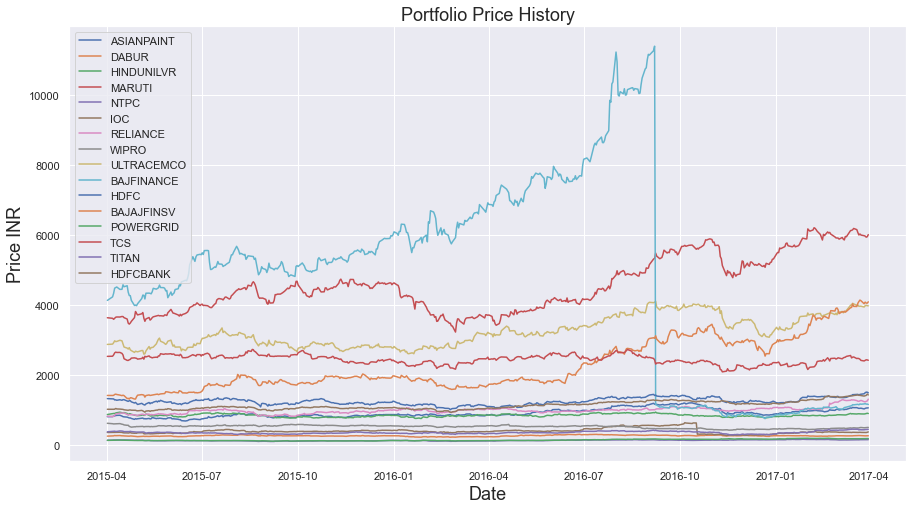

In [17]:
title = 'Portfolio Price History'
my_stocks = price_data

plt.figure(figsize=(15,8))
for c in my_stocks.columns.values:
    plt.plot(my_stocks[c], label = c)
plt.title(title, fontsize=18)
plt.xlabel('Date', fontsize = 18)
plt.ylabel('Price INR', fontsize = 18)
plt.legend(my_stocks.columns.values)
plt.show()

In [18]:
# Annual Covariance matrix for the portfolio
cov_mat_ann = return_data.cov() * 252
cov_mat_ann

,ASIANPAINT,DABUR,HINDUNILVR,MARUTI,NTPC,IOC,RELIANCE,WIPRO,ULTRACEMCO,BAJFINANCE,HDFC,BAJAJFINSV,POWERGRID,TCS,TITAN,HDFCBANK
ASIANPAINT,0.067624,0.017373,0.016348,0.027606,0.017152,0.024784,0.020427,0.013731,0.029386,0.026111,0.024423,0.023393,0.012239,0.008921,0.021325,0.013524
DABUR,0.017373,0.058798,0.017912,0.014541,0.011663,0.011816,0.013954,0.007512,0.014988,0.021694,0.014606,0.021849,0.007027,0.008334,0.020863,0.007015
HINDUNILVR,0.016348,0.017912,0.043677,0.013535,0.009158,0.009578,0.011436,0.006221,0.014687,0.007535,0.018122,0.010338,0.006815,0.008113,0.014490,0.010403
MARUTI,0.027606,0.014541,0.013535,0.066496,0.020546,0.024781,0.022093,0.011295,0.027629,0.022761,0.024813,0.022978,0.016027,0.013229,0.021012,0.016425
NTPC,0.017152,0.011663,0.009158,0.020546,0.061621,0.020015,0.017128,0.010979,0.019959,0.023033,0.019263,0.020251,0.023318,0.011837,0.011757,0.013949
IOC,0.024784,0.011816,0.009578,0.024781,0.020015,0.214551,0.020844,-0.000156,0.026803,0.023649,0.007899,0.019535,0.015543,0.000836,0.017883,0.010993
RELIANCE,0.020427,0.013954,0.011436,0.022093,0.017128,0.020844,0.064888,0.011013,0.020598,0.017755,0.023214,0.020812,0.010985,0.008440,0.011260,0.016998
WIPRO,0.013731,0.007512,0.006221,0.011295,0.010979,-0.000156,0.011013,0.040771,0.014019,0.018010,0.010052,0.010156,0.008369,0.018801,0.011300,0.009217
ULTRACEMCO,0.029386,0.014988,0.014687,0.027629,0.019959,0.026803,0.020598,0.014019,0.067884,0.025830,0.024357,0.025702,0.014294,0.014230,0.022016,0.018824
BAJFINANCE,0.026111,0.021694,0.007535,0.022761,0.023033,0.023649,0.017755,0.018010,0.025830,0.541222,0.027001,0.041358,0.011978,0.041174,0.022704,0.015644


# Importing libraries for portfolio optimization.

In [19]:
# pip install PyPortfolioOpt

In [20]:
from pypfopt.efficient_frontier import EfficientFrontier
from pypfopt import risk_models
from pypfopt import expected_returns

In [21]:
# Portfolio Optimization
# Calculate the expected returns and annualized covariance matrix of asset returns
MeanReturn = expected_returns.mean_historical_return(price_data)
SampleVariance = risk_models.sample_cov(price_data)

### Optimizing for max Sharpe Ratio.

In [22]:
ef = EfficientFrontier(MeanReturn, SampleVariance)
weights = ef.max_sharpe()
cleaned_weights = ef.clean_weights(cutoff = 0.0001, rounding=5)
print(cleaned_weights)

OrderedDict([('ASIANPAINT', 0.0), ('DABUR', 0.0), ('HINDUNILVR', 0.0), ('MARUTI', 0.14893), ('NTPC', 0.0), ('IOC', 0.0), ('RELIANCE', 0.12812), ('WIPRO', 0.0), ('ULTRACEMCO', 0.0), ('BAJFINANCE', 0.0), ('HDFC', 0.0), ('BAJAJFINSV', 0.47931), ('POWERGRID', 0.06487), ('TCS', 0.0), ('TITAN', 0.0), ('HDFCBANK', 0.17877)])


In [23]:
ef.portfolio_performance(verbose=True)

Expected annual return: 40.4%
Annual volatility: 19.9%
Sharpe Ratio: 1.93


(0.4038673932675742, 0.19893973723290162, 1.9295662023428486)

### Now dropping the values with zero weights

In [24]:
weights_final = {stock:weight for stock,weight in cleaned_weights.items() if weight != 0}
weights_final

{'MARUTI': 0.14893,
 'RELIANCE': 0.12812,
 'BAJAJFINSV': 0.47931,
 'POWERGRID': 0.06487,
 'HDFCBANK': 0.17877}

In [25]:
# Stocks to be included in portfolio
PortfolioStocks = list(weights_final)
print(PortfolioStocks)

PortfolioWeights = []
for weight in weights_final:
    PortfolioWeights.append(weights_final[weight])

PortfolioWeights = np.asarray(PortfolioWeights)
PortfolioWeights

['MARUTI', 'RELIANCE', 'BAJAJFINSV', 'POWERGRID', 'HDFCBANK']


array([0.14893, 0.12812, 0.47931, 0.06487, 0.17877])

In [26]:
# Checking if the sum of the weights = 1
weight_sum = 0
for stock in weights_final:
    weight_sum += weights_final[stock]
weight_sum

1.0

### Our final portfolio will have the following 5 stocks with weights shown:
#### HDFCBANK :  0.17877
#### MARUTI :  0.14893
#### POWERGRID :  0.06487
#### BAJAJFINSV :  0.47931
#### RELIANCE :  0.12812

### Q:3 Why are calculating the weights by optimization and not giving equal weightage to every stock?
To get an optimum portfolio, weights should be divided in such a way that we get optimum return with minimum risk. As each stock has different return and risk, giving equal weightage to each stock may cause very high risk or low return. For example, if we have more number of stocks with high volatility, then giving equal weights will result in a high risk portfolio or if we have more number of stocks that yield low return, then giving equal weights will result in a low return portfolio. So, by optimizing we are distributing the weights such that we get a potfolio with highest possible return for a permissible amount of risk.

### Q:4 Which optimization techniques are used by Mutual Funds currently?
Fuzzy optimization is used by most of the mutual funds now a days.

## Importing the testing data
#### Using 01/04/2017 to 31/03/2018 data to test the accuracy.

In [27]:
test_data = pd.DataFrame()
for stock in PortfolioStocks:
    test_data[stock] = get_history(symbol=stock, start=date(2017,4,1), end=date(2018,3,31))['Close']

In [28]:
test_data

,MARUTI,RELIANCE,BAJAJFINSV,POWERGRID,HDFCBANK
Date,,,,,
2017-04-03,6072.00,1374.65,4098.25,196.20,1433.20
2017-04-05,6342.40,1415.00,4128.80,195.00,1432.35
2017-04-06,6291.65,1438.50,4178.35,197.20,1438.50
2017-04-07,6259.35,1406.60,4226.20,195.00,1438.85
2017-04-10,6268.85,1381.35,4373.00,195.30,1434.15
...,...,...,...,...,...
2018-03-22,8696.55,908.15,5119.85,192.70,1867.75
2018-03-23,8607.25,893.90,5126.70,194.25,1841.55
2018-03-26,8765.30,901.10,5151.05,194.90,1893.45


## Visualizing the test data Closing Prices.

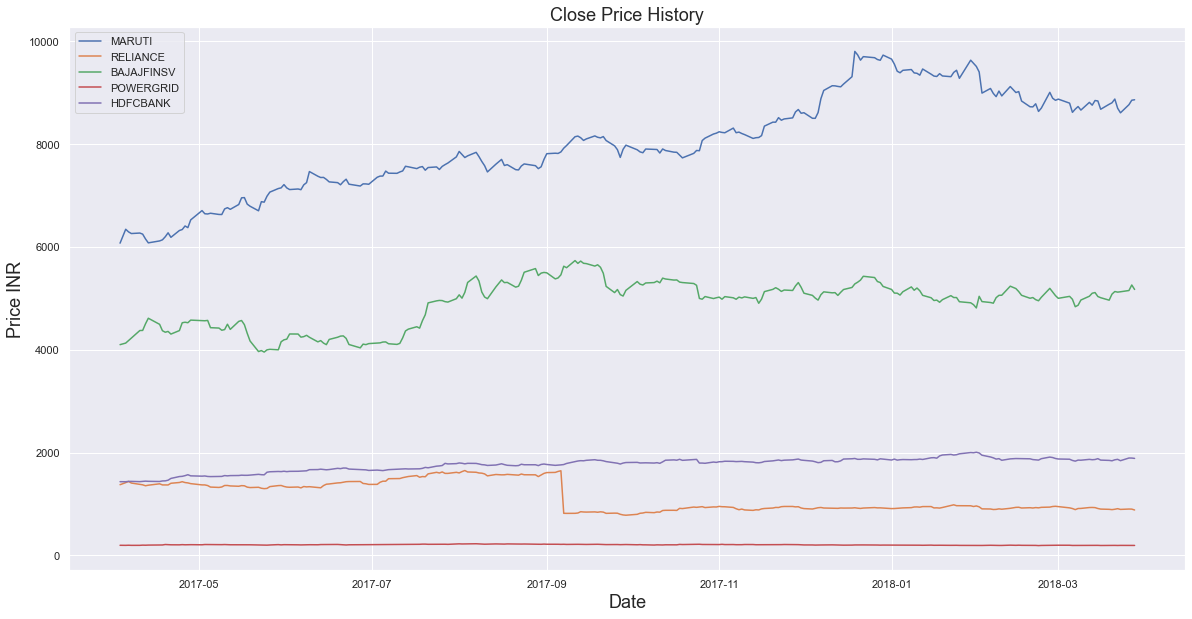

In [29]:
title = 'Close Price History'
my_stocks = test_data

plt.figure(figsize=(20,10))
for c in my_stocks.columns.values:
    plt.plot(my_stocks[c], label = c)
plt.title(title, fontsize = 18)
plt.xlabel('Date', fontsize = 18)
plt.ylabel('Price INR', fontsize = 18)
plt.legend(my_stocks.columns.values)
plt.show()

In [30]:
# Daily simple return for test data
test_returns = test_data.pct_change()
test_returns

,MARUTI,RELIANCE,BAJAJFINSV,POWERGRID,HDFCBANK
Date,,,,,
2017-04-03,NaN,NaN,NaN,NaN,NaN
2017-04-05,0.044532,0.029353,0.007454,-0.006116,-0.000593
2017-04-06,-0.008002,0.016608,0.012001,0.011282,0.004294
2017-04-07,-0.005134,-0.022176,0.011452,-0.011156,0.000243
2017-04-10,0.001518,-0.017951,0.034736,0.001538,-0.003266
...,...,...,...,...,...
2018-03-22,-0.020068,0.012543,-0.002270,-0.007724,0.004761
2018-03-23,-0.010268,-0.015691,0.001338,0.008044,-0.014028
2018-03-26,0.018362,0.008055,0.004750,0.003346,0.028183


In [31]:
# Annualized covariance matrix for test data
cov_mat_ann_test = test_returns.cov() * 252
cov_mat_ann_test

,MARUTI,RELIANCE,BAJAJFINSV,POWERGRID,HDFCBANK
MARUTI,0.034955,0.005619,0.016295,0.008176,0.009477
RELIANCE,0.005619,0.310310,-0.003271,0.003920,0.006931
BAJAJFINSV,0.016295,-0.003271,0.069343,0.008553,0.009767
POWERGRID,0.008176,0.003920,0.008553,0.031893,0.003232
HDFCBANK,0.009477,0.006931,0.009767,0.003232,0.018680


In [32]:
# Calculating the portfolio variance
port_variance = np.dot(PortfolioWeights.T, np.dot(cov_mat_ann_test, PortfolioWeights))
port_variance

0.027995975294155633

In [33]:
# portfolio volatility
port_volatility = np.sqrt(port_variance)
port_volatility

0.16731997876570398

In [34]:
# Annual portfolio return
port_Simple_ann_ret = np.sum(test_returns.mean()*PortfolioWeights) * 252
port_Simple_ann_ret

0.21455912537873983

### Q:5 Which parameters are we using to check the accuracy of our model?
We are using Expected annual return and Annual volatility/risk to determine if our model is giving us returns with affordable risk or not.

In [35]:
# expected annual return, volatility (risk), variance
percent_var = str(round(port_variance, 3)*100) + '%'
percent_vol = str(round(port_volatility, 3)*100) + '%'
percent_ret = str(round(port_Simple_ann_ret, 3)*100) + '%'

print('Expected annual return: '+percent_ret)
print('Annual volatility/risk: '+percent_vol)
print('Annual variance: '+percent_var)

Expected annual return: 21.5%
Annual volatility/risk: 16.7%
Annual variance: 2.8000000000000003%
